Predicting Pregnant Women who having Diabetes

Edited on 13 June

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.ensemble import ExtraTreesClassifier
import joblib
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from matplotlib.legend_handler import HandlerLine2D
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data_di=pd.read_excel("./all_1.xlsx")

In [3]:
len(data_di)

200

In [4]:
data_di.columns

Index(['#', 'MRN ', 'PARITY', 'FBS', '1H', '2H', 'BP', 'HBA1C', 'BMI', 'AGE',
       'Class', 'GDM'],
      dtype='object')

In [5]:
data_di=data_di.drop(['#', 'MRN ','GDM'], axis=1)

In [6]:
data_di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PARITY  200 non-null    int64  
 1   FBS     200 non-null    float64
 2   1H      200 non-null    float64
 3   2H      200 non-null    float64
 4   BP      200 non-null    int64  
 5   HBA1C   200 non-null    float64
 6   BMI     200 non-null    int64  
 7   AGE     200 non-null    int64  
 8   Class   200 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 14.2 KB


In [7]:
data_di.describe()

,PARITY,FBS,1H,2H,BP,HBA1C,BMI,AGE,Class
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.720000,4.875150,6.398000,5.871500,71.755000,2.651000,31.705000,31.750000,0.550000
std,2.701498,1.888281,4.455993,3.807878,8.756045,3.259913,5.508146,6.342605,0.498742
min,1.000000,0.000000,0.000000,0.000000,37.000000,0.000000,20.000000,16.000000,0.000000
25%,1.000000,4.217500,0.000000,4.000000,66.000000,0.000000,28.000000,27.000000,0.000000
50%,3.000000,4.630000,7.400000,5.950000,72.000000,0.000000,32.000000,32.000000,1.000000
75%,5.000000,5.532500,10.025000,8.625000,79.000000,5.825000,35.000000,36.000000,1.000000
max,13.000000,11.700000,16.000000,18.100000,91.000000,10.500000,48.000000,46.000000,1.000000


In [8]:
data_di.head()

,PARITY,FBS,1H,2H,BP,HBA1C,BMI,AGE,Class
0,1,10.75,0.0,0.0,82,10.2,34,24,1
1,4,5.10,0.0,4.2,83,0.0,25,32,0
2,11,6.27,0.0,7.2,73,6.4,34,39,1
3,2,4.26,0.0,4.4,76,0.0,35,32,0
4,3,4.11,0.0,4.6,75,5.3,37,32,1


<AxesSubplot:>

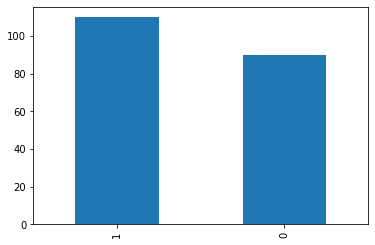

In [9]:
data_di['Class'].value_counts().plot(kind='bar') # class 1 has diabets , class 0 has not have diabetes

Discovering the Data

In [10]:
#data_di['AGE'].hist()

In [13]:
#sns.pairplot(data_di,hue='Class',palette='Dark2')

In [14]:
#fig=pd.plotting.scatter_matrix(data_di[[ 'PARITY', 'FBS', '1H', '2H', 'BP', 'HBA1C', 'BMI', 'AGE']], alpha=0.2 , figsize =(18.5, 13.5) )

Feature selection

Correlation 

In [15]:
data_di.corr()

,PARITY,FBS,1H,2H,BP,HBA1C,BMI,AGE,Class
PARITY,1.000000,0.115717,0.008052,0.134142,0.079512,0.288930,0.337867,0.725268,0.387136
FBS,0.115717,1.000000,0.078795,0.274933,0.001627,0.254689,0.141992,0.083151,0.249737
1H,0.008052,0.078795,1.000000,0.629732,-0.193963,-0.230034,0.081666,0.020625,0.037128
2H,0.134142,0.274933,0.629732,1.000000,-0.127549,-0.026163,0.024346,0.062518,0.199335
BP,0.079512,0.001627,-0.193963,-0.127549,1.000000,0.269583,0.286897,0.145566,0.176000
HBA1C,0.288930,0.254689,-0.230034,-0.026163,0.269583,1.000000,0.262368,0.264072,0.702189
BMI,0.337867,0.141992,0.081666,0.024346,0.286897,0.262368,1.000000,0.324535,0.288010
AGE,0.725268,0.083151,0.020625,0.062518,0.145566,0.264072,0.324535,1.000000,0.383637
Class,0.387136,0.249737,0.037128,0.199335,0.176000,0.702189,0.288010,0.383637,1.000000


In [16]:
data_di.corr()[['Class']].sort_values(by='Class', ascending=False)

,Class
Class,1.000000
HBA1C,0.702189
PARITY,0.387136
AGE,0.383637
BMI,0.288010
FBS,0.249737
2H,0.199335
BP,0.176000
1H,0.037128


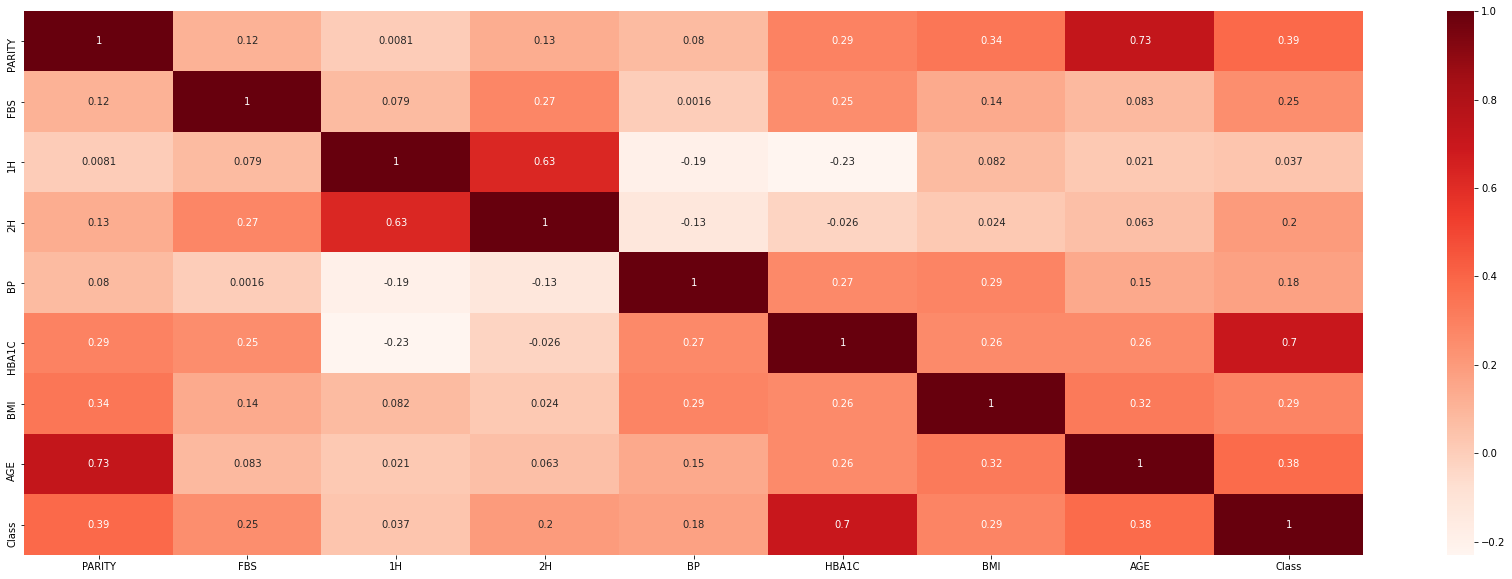

In [17]:
#correlation values more than 0.7  
dfCorr = data_di.corr()
#filteredDf = dfCorr[((dfCorr >= .7) & (dfCorr != 1)) ]
plt.figure(figsize=(30,10))
sns.heatmap(dfCorr, annot=True, cmap="Reds")
plt.show()

In [16]:
#findings
# There is a correlation between number of times of pragnency and age 
# There is a correlation betwee H1 tset and H2
# There is a correlation between HBA1C test and having diabetes or not 

Feature Importance

[0.08598537 0.14315732 0.18306787 0.15270647 0.04734029 0.32958273
 0.05815995]


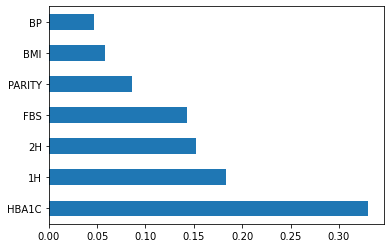

<Figure size 5760x6480 with 0 Axes>

In [18]:
X = data_di.iloc[:,0:7]  #independent columns
y = data_di.iloc[:,-1]    #target column 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
#plot graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh',)
plt.figure(figsize=(80,90))
plt.show()

splitting the data (to use it on the next features selection methods)

In [19]:
from sklearn.model_selection import train_test_split

y1=data_di['Class']
x1=data_di.drop('Class',axis=1)
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.3)

In [20]:
from sklearn.decomposition import PCA
threshold = 6  # the number of features
high_score_features = []
pca = PCA(n_components=5) #you can change the number of features
fit = pca.fit(x1)

print(fit.explained_variance_ratio_)

for score, f_name in sorted(zip(fit.explained_variance_ratio_, x1.columns), reverse=True):#[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)

[0.42405587 0.23393489 0.13465167 0.10418769 0.0491217 ]
PARITY 0.4240558677997084
FBS 0.2339348898204248
1H 0.13465166917756002
2H 0.1041876920444496
BP 0.049121697132939075


# AUC and ROC

In [21]:
def plotting_roc(test,prediction):
    print ('roc_auc_score', roc_auc_score(test,prediction))

    fpr, tpr, _ = roc_curve(test,prediction)

    print("Negative rate", fpr)
    print("Positive rate", tpr)
    print("***",_)

    plt.clf()
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

In [22]:
def   roc_curve_class (class_,model):

    tree_test_pred1= model.predict_proba(x_test1)[:, 1]
    precision, recall, thresholds = precision_recall_curve(
        y_test1, tree_test_pred1, pos_label = class_)

    # AUC score that summarizes the precision recall curve
    avg_precision = average_precision_score(y_test1, tree_test_pred1)

    label = 'Precision Recall AUC: {:.2f}'.format(avg_precision)
    plt.plot(recall, precision, lw = 2, label = label)
    plt.xlabel('Recall')  
    plt.ylabel('Precision')  
    plt.title('Precision Recall Curve')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Random Forest

In [23]:
clf_random = RandomForestClassifier()
clf_random.fit(x_train1, y_train1)

RandomForestClassifier()

In [24]:
importance = clf_random.feature_importances_
print(importance ,x_train1.columns )

[0.04678665 0.15603468 0.16909756 0.1552047  0.04811844 0.30169271
 0.03528536 0.0877799 ] Index(['PARITY', 'FBS', '1H', '2H', 'BP', 'HBA1C', 'BMI', 'AGE'], dtype='object')


<BarContainer object of 8 artists>

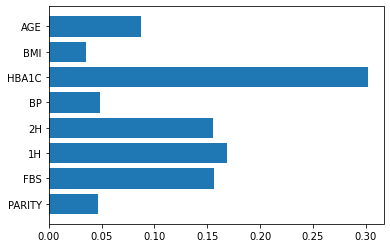

In [25]:
plt.barh(x_train1.columns, clf_random.feature_importances_)

In [26]:
train_predict=clf_random.predict(x_train1)
y_predict=clf_random.predict(x_test1)

In [27]:
print("Training accuracy", accuracy_score(y_train1,train_predict))
print("Testing accuracy", accuracy_score(y_test1,y_predict))

Training accuracy 1.0
Testing accuracy 0.9666666666666667


In [28]:
print(classification_report(y_train1,train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        75

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [29]:
print(classification_report(y_test1, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.97      0.97      0.97        35

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



Text(91.68, 0.5, 'predicted label')

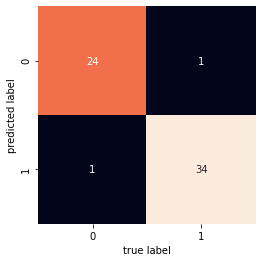

In [30]:
cm = confusion_matrix(y_test1, y_predict)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

roc_auc_score 0.9657142857142857
Negative rate [0.   0.04 1.  ]
Positive rate [0.         0.97142857 1.        ]
*** [2 1 0]


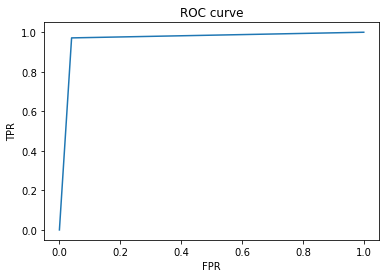

In [31]:
plotting_roc(y_test1, y_predict)

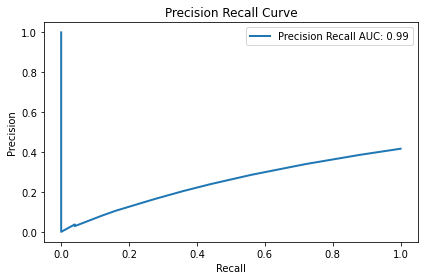

In [32]:
#class 0
roc_curve_class (0,clf_random) 

Hyperparemeters (random-forest)


The code below illustrates the parametets that need to be tuned in order to obtain a model with optimal performance.

In [38]:
# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [40]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
#                                cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [41]:
# rf_random.fit(x_train1, y_train1)

In [42]:
# rf_random.best_params_

In [43]:
#rf_random.best_estimator_

In [44]:
#building random forset classifier with best parameters
# cl_ran=rf = RandomForestClassifier(n_estimators= 400,
#  min_samples_split= 5,
#  min_samples_leaf= 1,
#  max_features='sqrt',
#  max_depth= 30,
#  bootstrap= True)

In [45]:
#cl_ran.fit(x_train1,y_train1)

In [46]:
#y_n_predict_train=cl_ran.predict(x_train1)

In [47]:
#print(classification_report(y_train1, y_n_predict_train))

In [48]:
#y_n_predict=cl_ran.predict(x_test1)

In [49]:
#print(classification_report(y_test1, y_n_predict))

In [50]:
#plotting_roc(y_test1, y_n_predict)

In [51]:
# cm = confusion_matrix(y_test1, y_n_predict)
# sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
# plt.xlabel('true label')
# plt.ylabel('predicted label')

# GradientBoostingClassifier

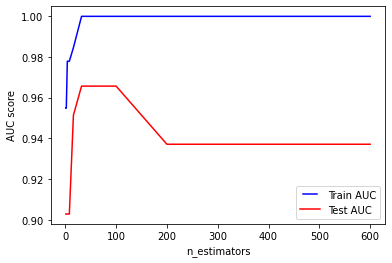

In [52]:
#to choose the number of estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200,400,600]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = GradientBoostingClassifier(n_estimators=estimator)
   rf.fit(x_train1, y_train1)
   train_pred = rf.predict(x_train1)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train1, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test1)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [53]:
boos_cl=GradientBoostingClassifier(n_estimators=100)

In [54]:
boos_cl.fit(x_train1,y_train1)

GradientBoostingClassifier()

In [55]:
train_pred_log = boos_cl.predict(x_train1)

In [56]:
training_accuracy =( boos_cl.score(x_train1,y_train1))*100
training_accuracy

100.0

In [57]:
print(classification_report(y_train1, train_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        75

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [58]:
testing_accuracy =( boos_cl.score(x_test1,y_test1))*100
testing_accuracy

96.66666666666667

In [59]:
test_pred_log = boos_cl.predict(x_test1)

In [60]:
print(classification_report(y_test1, test_pred_log))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.97      0.97      0.97        35

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



Text(91.68, 0.5, 'predicted label')

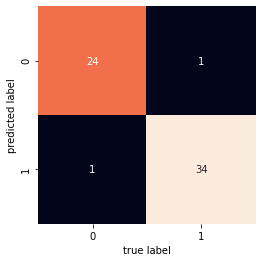

In [61]:
cm = confusion_matrix(y_test1, test_pred_log)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Support Vetcor Machine

In [67]:
svc=svm.SVC(kernel='linear') # Linear Kernel

In [68]:
svc.fit(x_train1, y_train1)

SVC(kernel='linear')

In [69]:
y_pred1 = svc.predict(x_train1)

In [70]:
print("Accuracy:",(metrics.accuracy_score(y_train1, y_pred1)*100))
print("Precision:",(metrics.precision_score(y_train1, y_pred1)*100))
print("Recall:",(metrics.recall_score(y_train1, y_pred1)*100))

Accuracy: 90.71428571428571
Precision: 95.58823529411765
Recall: 86.66666666666667


In [71]:
y_pred = svc.predict(x_test1)

In [72]:
print("Accuracy:",(metrics.accuracy_score(y_test1, y_pred)*100))
print("Precision:",(metrics.precision_score(y_test1, y_pred)*100))
print("Recall:",(metrics.recall_score(y_test1, y_pred)*100))

Accuracy: 91.66666666666666
Precision: 96.875
Recall: 88.57142857142857


Text(91.68, 0.5, 'predicted label')

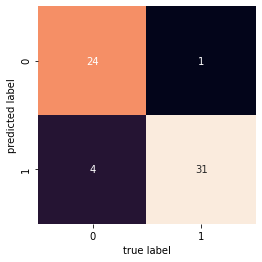

In [73]:
cm = confusion_matrix(y_test1, y_pred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [74]:
print (classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        25
           1       0.97      0.89      0.93        35

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



roc_auc_score 0.9228571428571428
Negative rate [0.   0.04 1.  ]
Positive rate [0.         0.88571429 1.        ]
*** [2 1 0]


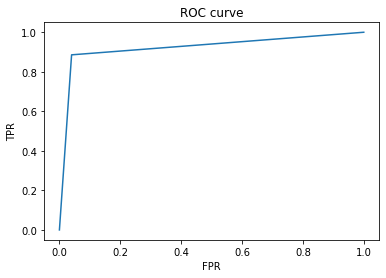

In [75]:
plotting_roc(y_test1, y_pred)

# KNN

In [77]:
# from sklearn import datasets, neighbors
# from mlxtend.plotting import plot_decision_regions
# def ok(X,Y):
#   x = data_di[[X,Y]].values
#   y = data_di['Class'].astype(int).values
#   clf = neighbors.KNeighborsClassifier(n_neighbors=9)
#   clf.fit(x, y)
#   # Plotting decision region
#   plot_decision_regions(x, y, clf=clf, legend=2)
#   # Adding axes annotations
#   plt.xlabel(X)
#   plt.ylabel(Y)
#   plt.title('Knn with K='+ str(9))
#   plt.show()
# tt = ['PARITY', 'FBS', '1H', '2H', 'BP', 'HBA1C', 'BMI', 'AGE']
# ll = len(tt)
# for i in range(0,ll):
#   for j in range(i+1,ll):
#     ok(tt[i],tt[j])

In [78]:
data_copy=data_di

In [79]:
data_copy.columns

Index(['PARITY', 'FBS', '1H', '2H', 'BP', 'HBA1C', 'BMI', 'AGE', 'Class'], dtype='object')

In [80]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Class"],axis = 1),),
        columns=['PARITY', 'FBS', '1H', '2H', 'BP', 'HBA1C', 'BMI', 'AGE'])

In [81]:
X.head()

,PARITY,FBS,1H,2H,BP,HBA1C,BMI,AGE
0,-1.009375,3.119023,-1.439422,-1.545804,1.172985,2.321517,0.417701,-1.224962
1,0.103906,0.119375,-1.439422,-0.440060,1.287478,-0.815253,-1.220343,0.039515
2,2.701564,0.740541,-1.439422,0.349757,0.142544,1.152917,0.417701,1.145932
3,-0.638282,-0.326590,-1.439422,-0.387405,0.486025,-0.815253,0.599706,0.039515
4,-0.267188,-0.406227,-1.439422,-0.334751,0.371531,0.814637,0.963716,0.039515


In [82]:
y=data_copy['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [83]:
test_scores = []
train_scores = []

for i in range(1,6):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [84]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [85]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing 
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 94.02985074626866 % and k = [1]


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


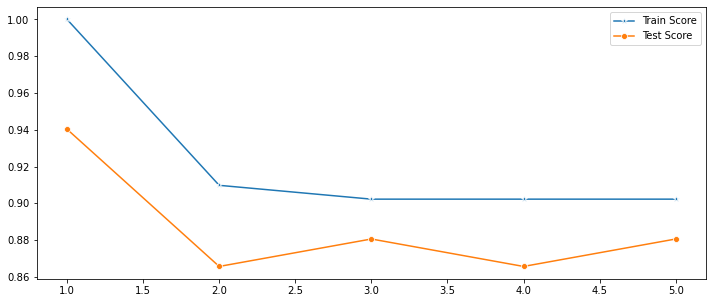

In [86]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,6),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,6),test_scores,marker='o',label='Test Score')

To choose the best K value

In [87]:
tt = {}
il = []
ac=[]
for  i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    il.append(i)
    ac.append(roc_auc_score(y_test,y_pred) )
    tt.update({'K':il})
    tt.update({'ROC_ACC':ac})
    
vv = pd.DataFrame(tt)
vv.sort_values('ROC_ACC',ascending=False,inplace=True,ignore_index=True)
vv.head(10)

,K,ROC_ACC
0,1,0.942793
1,8,0.888739
2,5,0.888739
3,6,0.888739
4,3,0.885586
5,9,0.885586
6,7,0.885586
7,2,0.875225
8,4,0.875225
9,10,0.872072


Setup a knn classifier with k neighbors

In [88]:
knn = KNeighborsClassifier(1)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9402985074626866

C:\Users\admin\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,
C:\Users\admin\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(x_data,


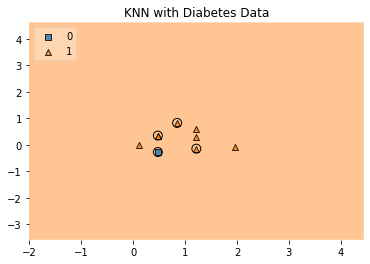

In [89]:
from mlxtend.plotting import plot_decision_regions
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

confusion_matrix

In [90]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,29,1,30
1,3,34,37
All,32,35,67


In [103]:
# #import confusion_matrix
# from sklearn.metrics import confusion_matrix
# #let us get the predictions using the classifier we had fit above
# y_pred = knn.predict(X_test)
# confusion_matrix(y_test,y_pred)
# pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [91]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [95]:
#y_pred_proba

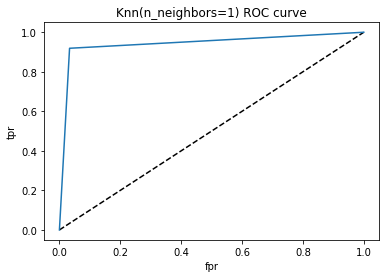

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=1) ROC curve')
plt.show()

In [96]:
roc_auc_score(y_test,y_pred_proba)*100

94.27927927927927

Specifying the parameter to be tuned is n_neighbors

In [100]:
# from sklearn.model_selection import GridSearchCV
# #In case of classifier like knn the parameter to be tuned is n_neighbors
# param_grid = {'n_neighbors':np.arange(1,50)}
# knn = KNeighborsClassifier()
# knn_cv= GridSearchCV(knn,param_grid,cv=5)
# knn_cv.fit(X,y)

# print("Best Score:" + str(knn_cv.best_score_))
# print("Best Parameters: " + str(knn_cv.best_params_))

Plotting roc for multiple models

Testing accuracy

In [101]:
classifiers = [ 
               GradientBoostingClassifier(), 
               KNeighborsClassifier(), 
              # svm.SVC(),
               RandomForestClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_train1, y_train1)
    yproba = model.predict_proba(x_test1)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test1,  yproba)
    auc = roc_auc_score(y_test1, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

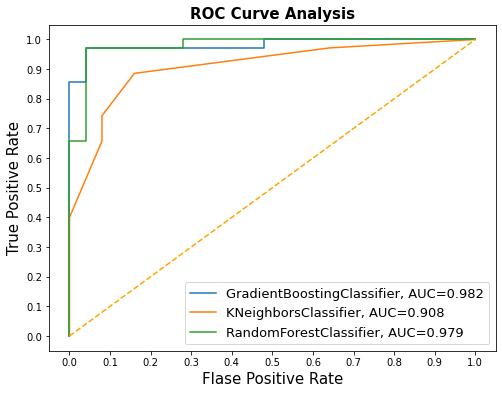

In [102]:
ig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Taining Accuracy

In [103]:
classifiers = [
               GradientBoostingClassifier(), 
               KNeighborsClassifier(), 
              # svm.SVC(),
               RandomForestClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_train1, y_train1)
    yproba = model.predict_proba(x_train1)[::,1]
    
    fpr, tpr, _ = roc_curve(y_train1,  yproba)
    auc = roc_auc_score(y_train1, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

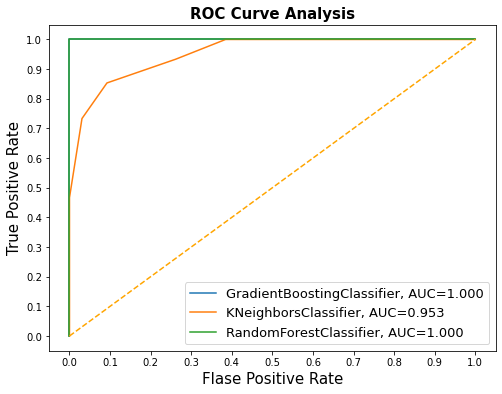

In [104]:
ig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
################################################################